In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Simulation

In [2]:
outcomes = make_array('heads', 'tails')

In [3]:
np.random.choice(outcomes)

'tails'

In [4]:
np.random.choice(outcomes, 10)

array(['heads', 'tails', 'heads', 'tails', 'tails', 'heads', 'tails',
       'heads', 'tails', 'tails'],
      dtype='<U5')

In [5]:
np.random.choice(outcomes, 10) == 'heads'

array([ True, False,  True,  True,  True,  True, False, False, False, False], dtype=bool)

In [6]:
sum(np.random.choice(outcomes, 10) == 'heads')

5

In [7]:
sum(np.random.choice(outcomes, 10) == 'tails')

8

In [8]:
flips = np.random.choice(outcomes, 10)

In [9]:
sum(flips == 'heads')

5

In [10]:
sum(flips == 'tails')

5

In [11]:
def heads_in_100_tosses():
    return sum(np.random.choice(outcomes, 100) == 'heads')

In [12]:
results = make_array()

for i in np.arange(10000):
    results = np.append(results, heads_in_100_tosses())
    
results

array([ 57.,  55.,  54., ...,  57.,  47.,  49.])

In [13]:
heads = Table().with_columns('Heads', results)
heads

Heads
57
55
54
47
46
47
49
48
48
69


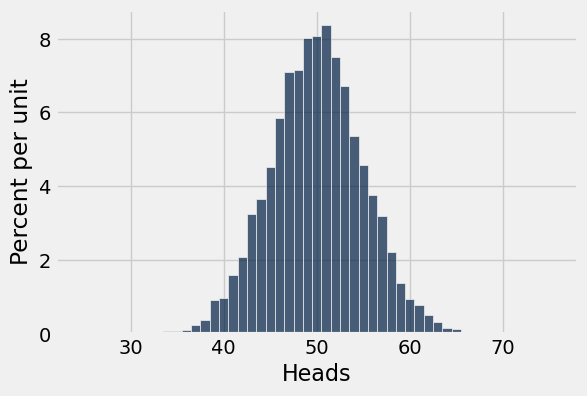

In [14]:
heads.hist('Heads', bins=np.arange(24.5, 76.5))

## Monty Hall

In [15]:
doors = make_array('car', 'first goat', 'second goat')

In [16]:
goats = make_array('first goat', 'second goat')

def other_goat(a_goat):
    if a_goat == 'first goat':
        return 'second goat'
    elif a_goat == 'second goat':
        return 'first goat'


In [17]:
other_goat('first goat')

'second goat'

In [18]:
other_goat('wheeler hall')

In [19]:
def monty_hall():
    
    contestant_choice = np.random.choice(doors)
    
    if contestant_choice == 'first goat':
        monty_choice = 'second goat'
        remaining_door = 'car'
        
    elif contestant_choice == 'second goat':
        monty_choice = 'first goat'
        remaining_door = 'car'
        
    elif contestant_choice == 'car':
        monty_choice = np.random.choice(goats)
        remaining_door = other_goat(monty_choice)
        
    return [contestant_choice, monty_choice, remaining_door]

In [20]:
monty_hall()

['car', 'first goat', 'second goat']

In [21]:
games = Table(['Guess', 'Revealed', 'Remaining'])

In [22]:
games.append(monty_hall())

Guess,Revealed,Remaining
second goat,first goat,car


In [23]:
games = Table(['Guess', 'Revealed', 'Remaining'])
for i in range(3000):
    games.append(monty_hall())
    
games

Guess,Revealed,Remaining
second goat,first goat,car
first goat,second goat,car
car,first goat,second goat
second goat,first goat,car
second goat,first goat,car
car,second goat,first goat
second goat,first goat,car
car,second goat,first goat
first goat,second goat,car
car,second goat,first goat


In [24]:
games.group('Remaining')

Remaining,count
car,2003
first goat,508
second goat,489


In [25]:
games.group('Guess')

Guess,count
car,997
first goat,1029
second goat,974
